In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
review_json_path = '../raw_data/yelp_academic_dataset_review.json'

In [3]:
size = 1000000
review = pd.read_json(review_json_path, lines=True,
                      dtype={'review_id':str,'user_id':str,
                             'business_id':str,'stars':int,
                             'date':str,'text':str,'useful':int,
                             'funny':int,'cool':int},
                      chunksize=size)

In [4]:
review

In [5]:
df = pd.read_json('../raw_data/yelp_academic_dataset_business.json', lines=True)

In [6]:
df_100 = df.sort_values('review_count', ascending=False).head(100)

In [7]:
df_100['review_count'].sum()

279460

In [8]:
chunk_list = []
for chunk_review in review:
    chunk_review = chunk_review.rename(columns={'stars': 'review_stars'})
    chunk_merged = pd.merge(df_100, chunk_review, on='business_id', how='inner')
    print(f"{chunk_merged.shape[0]} out of {size:,} related reviews")
    chunk_list.append(chunk_merged)
# After trimming down the review file, concatenate all relevant data back to one dataframe
df_sample = pd.concat(chunk_list, ignore_index=True, join='outer', axis=0)

32992 out of 1,000,000 related reviews
36088 out of 1,000,000 related reviews
47536 out of 1,000,000 related reviews
34148 out of 1,000,000 related reviews
25155 out of 1,000,000 related reviews
26875 out of 1,000,000 related reviews
38113 out of 1,000,000 related reviews
25145 out of 1,000,000 related reviews
19617 out of 1,000,000 related reviews


In [9]:
df_sample.shape

(285669, 22)

/Users/pedrofranca/.pyenv/versions/3.8.6/envs/Sentimedia/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


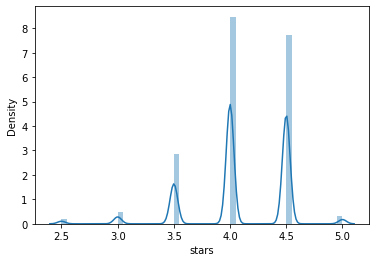

In [10]:
sns.distplot(df_sample['stars']);

In [12]:
from wordcloud import WordCloud, STOPWORDS
import string

In [13]:
df_1 = df_sample[df_sample.business_id == '4CxF8c3MB7VAdY8zFb2cZQ']

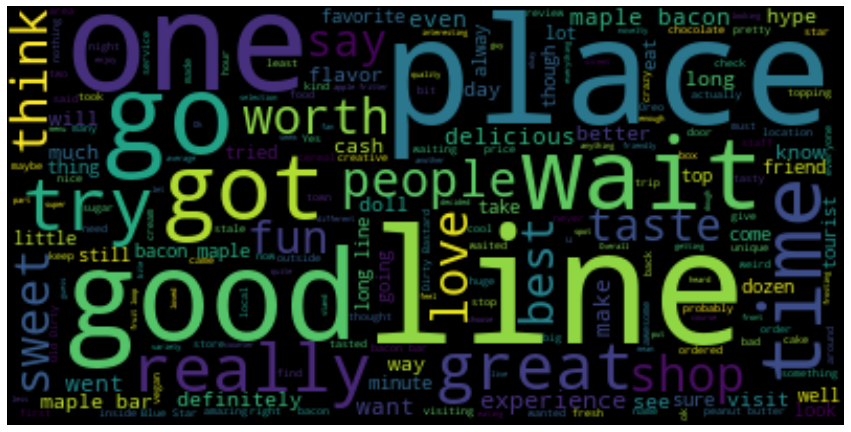

In [14]:
stopwords = set(STOPWORDS)
stopwords.update(["donut","donuts" ,"doughnut","doughnuts","Voodoo", "Portland"])

wordcloud = WordCloud(stopwords=stopwords).generate(' '.join(df_1.text))

# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
df_good = df_sample[df_sample['review_stars']>3]

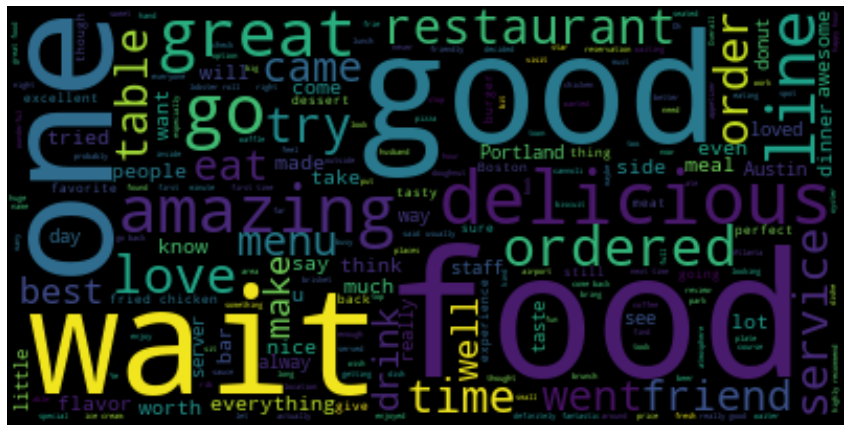

In [16]:
stopwords = set(STOPWORDS)
stopwords.update(["place","got"])
wordcloud = WordCloud(stopwords=stopwords).generate(' '.join(df_good.text))

# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

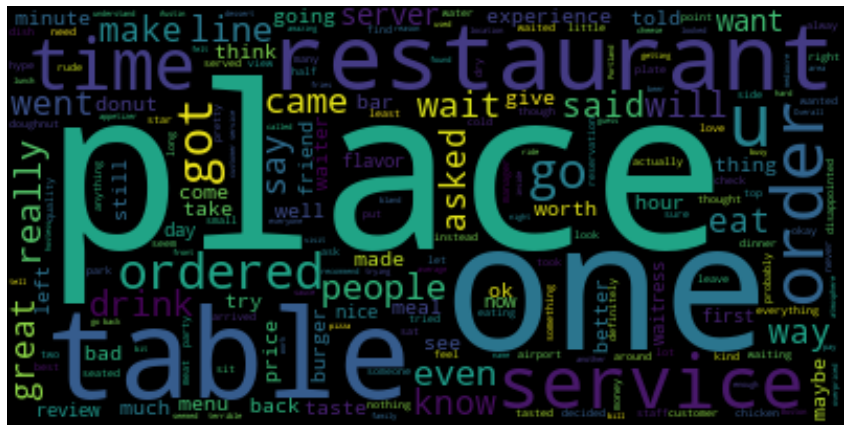

In [17]:
df_bad = df_sample[df_sample['review_stars']<3]
stopwords = set(STOPWORDS)
stopwords.update(["food","good"])
wordcloud = WordCloud(stopwords=stopwords).generate(' '.join(df_bad.text))

# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
df_sample.shape

(285669, 22)

In [37]:
import spacy
import scattertext as sct
nlp = spacy.load('en_core_web_sm')

In [34]:
def good_bad_review(x):
    if x >= 4:
        return 'good'
    return 'bad'

In [44]:
def get_rest_reviews(rest_name, city_name):
    rest_reviews = df_sample[(df_sample.name == rest_name)&(df_sample.city == city_name)][['name','city','stars','review_stars','text']]
    rest_reviews['class'] = rest_reviews.review_stars.map(good_bad_review)
    return rest_reviews

In [38]:
def get_sct_html(rest_name, city_name):
    rest_reviews = get_rest_reviews(rest_name, city_name)
    corpus = sct.CorpusFromPandas(rest_reviews,
                             category_col='class',
                             text_col='text',
                             nlp=nlp).build()
    html = sct.produce_scattertext_explorer(corpus,
         category='good',
         category_name='Positive',
         not_category_name='Negative',
         width_in_pixels=1000,
         metadata=rest_reviews['class'])
    return open("rest_reviews-Vis.html", 'wb').write(html.encode('utf-8'))

In [ ]:
df2_sample = df_sample[0:1000]

In [31]:
df2_sample = df2_sample[['name','city','stars','review_stars','text']]
df2_sample['class'] = df2_sample.review_stars.map(binary_review)

In [32]:
corpus = st.CorpusFromPandas(df2_sample,
                             category_col='class',
                             text_col='text',
                             nlp=nlp).build()

In [33]:
html = st.produce_scattertext_explorer(corpus,
         category='good',
         category_name='Positive',
         not_category_name='Negative',
         width_in_pixels=1000,
         metadata=df2_sample['class'])
open("sample-1k-Vis.html", 'wb').write(html.encode('utf-8'))

1466840

In [39]:
df2_sample

,name,city,stars,review_stars,text,class
0,Pok Pok,Portland,4.0,5,Atmosphere: Nailed it. the outdoor patio is or...,good
1,Pok Pok,Portland,4.0,4,This place felt VERY authentic (down to the ri...,good
2,Pok Pok,Portland,4.0,4,"The chicken wings were da BOMB, if you're unsu...",good
3,Pok Pok,Portland,4.0,1,OVERRATED!!!\n\nI'm from out of state and I ca...,bad
4,Pok Pok,Portland,4.0,4,Delicious street vendor style Thai / SE Asian ...,good
...,...,...,...,...,...,...
995,Pok Pok,Portland,4.0,3,Read the update. I bumped em up for that. \n\n...,bad
996,Pok Pok,Portland,4.0,5,Geez. The wings are amazing! The line and wait...,good
997,Pok Pok,Portland,4.0,3,I had high expectations for this place because...,bad
998,Pok Pok,Portland,4.0,4,Unbelievably delicious. The papaya salad is in...,good


In [45]:
get_sct_html('Pok Pok', 'Portland')

6273710

In [47]:
rest_reviews = get_rest_reviews('Pok Pok', 'Portland')
rest_reviews[rest_reviews['class'] == 'good']

,name,city,stars,review_stars,text,class
0,Pok Pok,Portland,4.0,5,Atmosphere: Nailed it. the outdoor patio is or...,good
1,Pok Pok,Portland,4.0,4,This place felt VERY authentic (down to the ri...,good
2,Pok Pok,Portland,4.0,4,"The chicken wings were da BOMB, if you're unsu...",good
4,Pok Pok,Portland,4.0,4,Delicious street vendor style Thai / SE Asian ...,good
5,Pok Pok,Portland,4.0,4,"Great food, the fish sauce wings are unreal! ...",good
...,...,...,...,...,...,...
40977,Pok Pok,Portland,4.0,4,Pok Pok clearly has quality food and drink. Th...,good
40979,Pok Pok,Portland,4.0,4,Pok Pok is an experience. One that I'd recomme...,good
40980,Pok Pok,Portland,4.0,4,An awsome little take out space with a covered...,good
40982,Pok Pok,Portland,4.0,5,I came to the original location around an hour...,good


In [64]:
def make_wordcloud(rest_name, city_name):
    rest_reviews = get_rest_reviews(rest_name, city_name)
    rest_reviews_good = rest_reviews[rest_reviews['class'] == 'good']
    rest_reviews_bad = rest_reviews[rest_reviews['class'] == 'bad']
    
    stopwords = set(STOPWORDS)
    stopwords.update([rest_name, city_name])

    wordcloud_good = WordCloud(stopwords=stopwords).generate(' '.join(rest_reviews_good.text))
    wordcloud_bad = WordCloud(stopwords=stopwords).generate(' '.join(rest_reviews_bad.text))


    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

    axes[0].imshow(wordcloud_good, interpolation='bilinear')
    axes[0].axis("off")

    axes[1].imshow(wordcloud_bad, interpolation='bilinear')
    axes[1].axis("off")

    return fig.tight_layout()

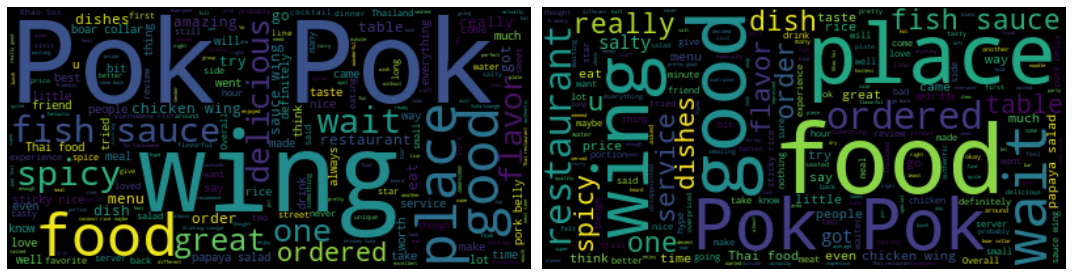

In [65]:
make_wordcloud('Pok Pok', 'Portland')

In [182]:
pos_dict = {}
i = 0
for l in 'qwert':
    i = i + 1
    pos_dict[l] = i

In [183]:
neg_dict = {}
i = 0
for l in 'asdfg':
    i = i + 1
    neg_dict[l] = i

In [184]:
for key, value in neg_dict.items():
    neg_dict[key] = value*-1

In [149]:
pos_dict

{'q': 1,
 'w': 2,
 'e': 3,
 'r': 4,
 't': 5,
 'y': 6,
 'u': 7,
 'i': 8,
 'o': 9,
 'p': 10}

In [153]:
neg_dict

{'a': -1,
 's': -2,
 'd': -3,
 'f': -4,
 'g': -5,
 'h': -6,
 'j': -7,
 'k': -8,
 'l': -9}

In [185]:
neg_dict = dict(sorted(neg_dict.items(), key=lambda item: item[1]))

In [186]:
neg_dict.update(pos_dict)

In [187]:
neg_dict

{'g': -5,
 'f': -4,
 'd': -3,
 's': -2,
 'a': -1,
 'q': 1,
 'w': 2,
 'e': 3,
 'r': 4,
 't': 5}

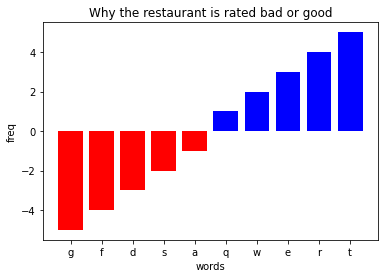

In [190]:
def make_barplot():
    for key, value in n_dict_5.items():
        n_dict_5[key] = value*-1
    n_dict_5 = dict(sorted(n_dict_5.items(), key=lambda item: item[1]))
    n_dict_5.update(p_dict_5)
    plt.bar(n_dict_5.keys(),n_dict_5.values(), color=['r','r','r','r','r','b','b','b','b','b'])
    plt.ylabel('freq')
    plt.xlabel('words')
    plt.xticks(rotation = 45)
    plt.title('Why the restaurant is rated bad or good')
    return plt.show()